In [58]:
import pandas as pd

In [59]:
ai_papers = pd.read_csv('./datasets/ai_papers.csv')
dl_papers = pd.read_csv('./datasets/dl_papers.csv')
cv_papers = pd.read_csv('./datasets/cv_papers.csv')

In [60]:
n_papers = 50

ai_papers = ai_papers.iloc[:n_papers, :]
dl_papers = dl_papers.iloc[:n_papers, :]
cv_papers = cv_papers.iloc[:n_papers, :]

In [61]:
# Adicionando coluna 'label'

ai_papers['label'] = "Artificial Intelligence"
dl_papers['label'] = "Digital Libraries"
cv_papers['label'] = "Computer Vision"


In [62]:
# Concatenando os datasets e exportando

papers = pd.concat([ai_papers, dl_papers, cv_papers])
if 'Unnamed: 0' in papers.columns:
    papers.drop(['Unnamed: 0'], axis=1, inplace=True)

## Primeira análise: distilBert + abstracts

In [63]:
# Alterando colunas para "text" e "label"

abstracts = papers[['abstract', 'label']]
abstracts = abstracts.rename({'abstract':'text'}, axis=1)

In [64]:
# # !pip install spacy
# import spacy

# nlp = spacy.load('en_core_web_sm')

# def remove_stopwords_spacy(text):
#     doc = nlp(text)
#     tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
#     return ' '.join(tokens)

# abstracts['text'] = abstracts['text'].apply(remove_stopwords_spacy)

# print(abstracts['text'])


In [65]:
# Pipeline para acelerar transformação para Dataset do HuggingFace

def hf_pipeline(data):
    from datasets import Dataset, ClassLabel

    unique_classes = data['label'].unique()

    dataframe = Dataset.from_pandas(data)
    class_label = ClassLabel(names=list(unique_classes))

    dataframe = dataframe.cast_column('label', class_label)

    return dataframe

In [66]:
abstracts = hf_pipeline(abstracts)

Casting the dataset: 100%|██████████| 150/150 [00:00<00:00, 59013.75 examples/s]


In [67]:
# Definindo o distilBert como primeiro modelo a ser usado

model_ckpt = 'distilbert-base-uncased'

In [68]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA, SVD

pca = PCA(n_components=40)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

### Obtendo métricas para o distilbert-base-uncased

In [69]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 150/150 [00:27<00:00,  5.36 examples/s]


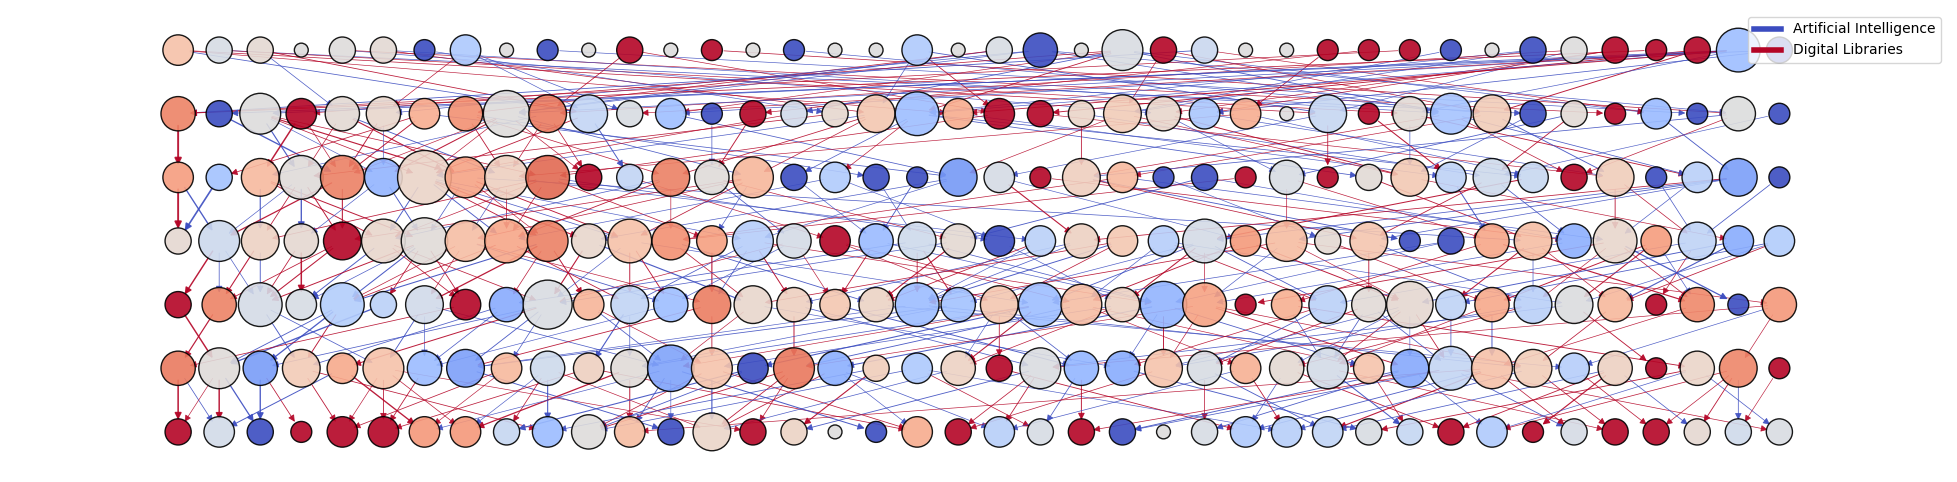

In [70]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.3)
_ = llm_mri.get_graph_image(g)
plt.show()

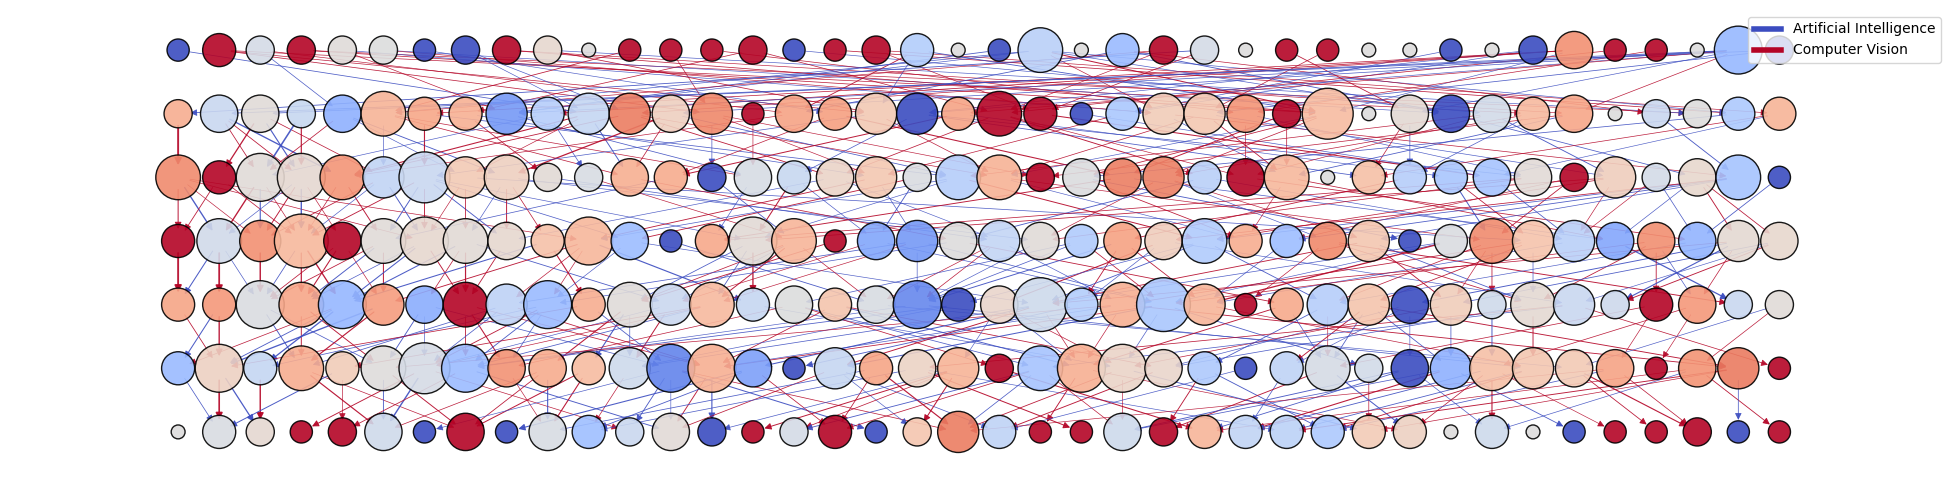

In [71]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.3)
_ = llm_mri.get_graph_image(g)
plt.show()

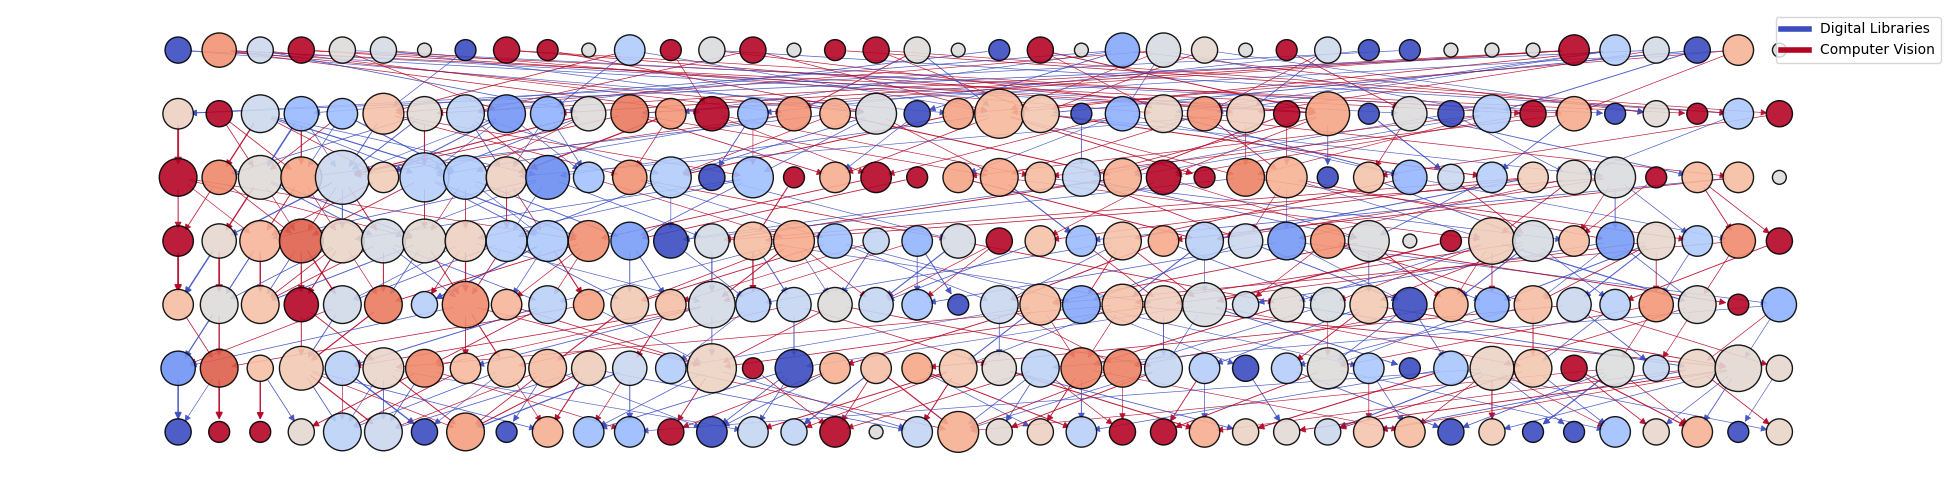

In [72]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Digital Libraries', 'Computer Vision'], threshold=0.3)
_ = llm_mri.get_graph_image(g)
plt.show()

## Obtendo métricas para o bert-base-uncased

In [73]:
model_ckpt = 'bert-large-uncased'
# model_ckpt = 'FacebookAI/roberta-base'

In [74]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import UMAP

umap = UMAP(n_components=2)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=umap)

/home/lipecorradini/.cache/pypoetry/virtualenvs/llm-mri-RE74i_Ji-py3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [75]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map:   0%|          | 0/150 [21:13<?, ? examples/s]


KeyboardInterrupt: 

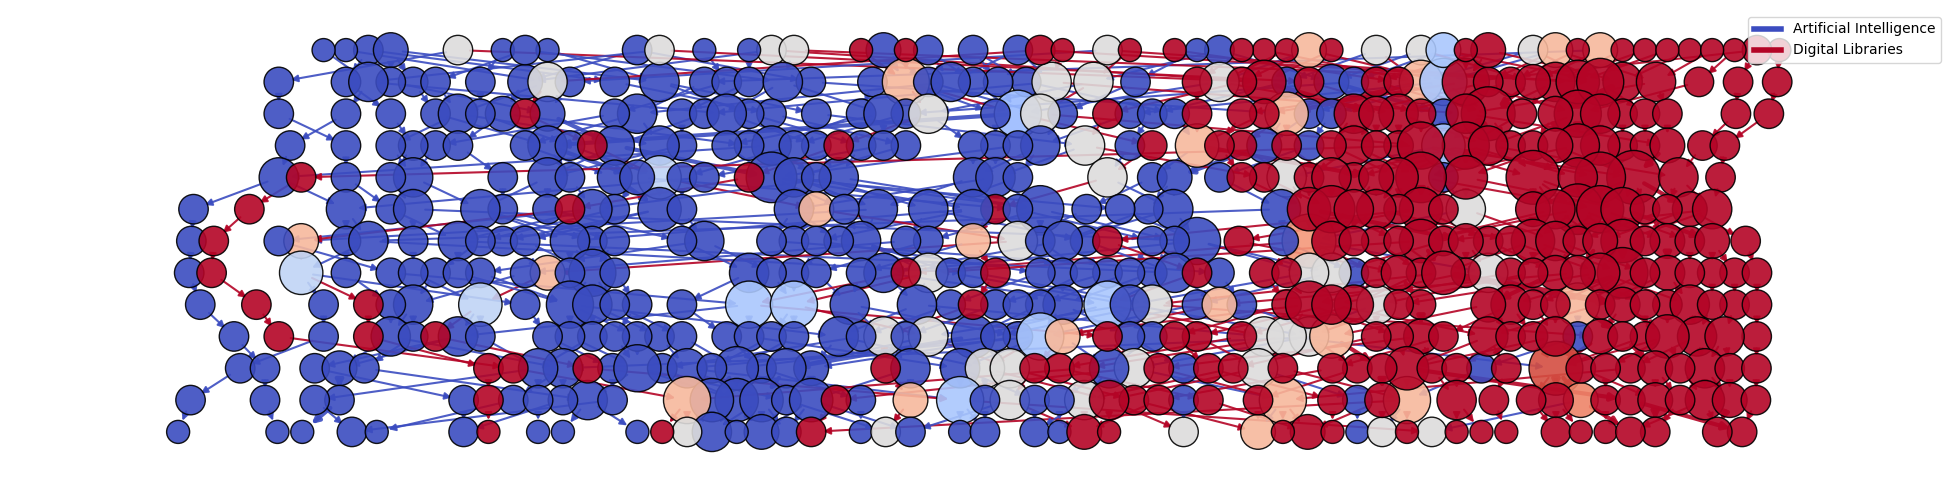

In [ ]:
# Visualização das ativações

import matplotlib.pyplot as plt
g_ai_dl = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'])
_ = llm_mri.get_graph_image(g_ai_dl)
plt.show()

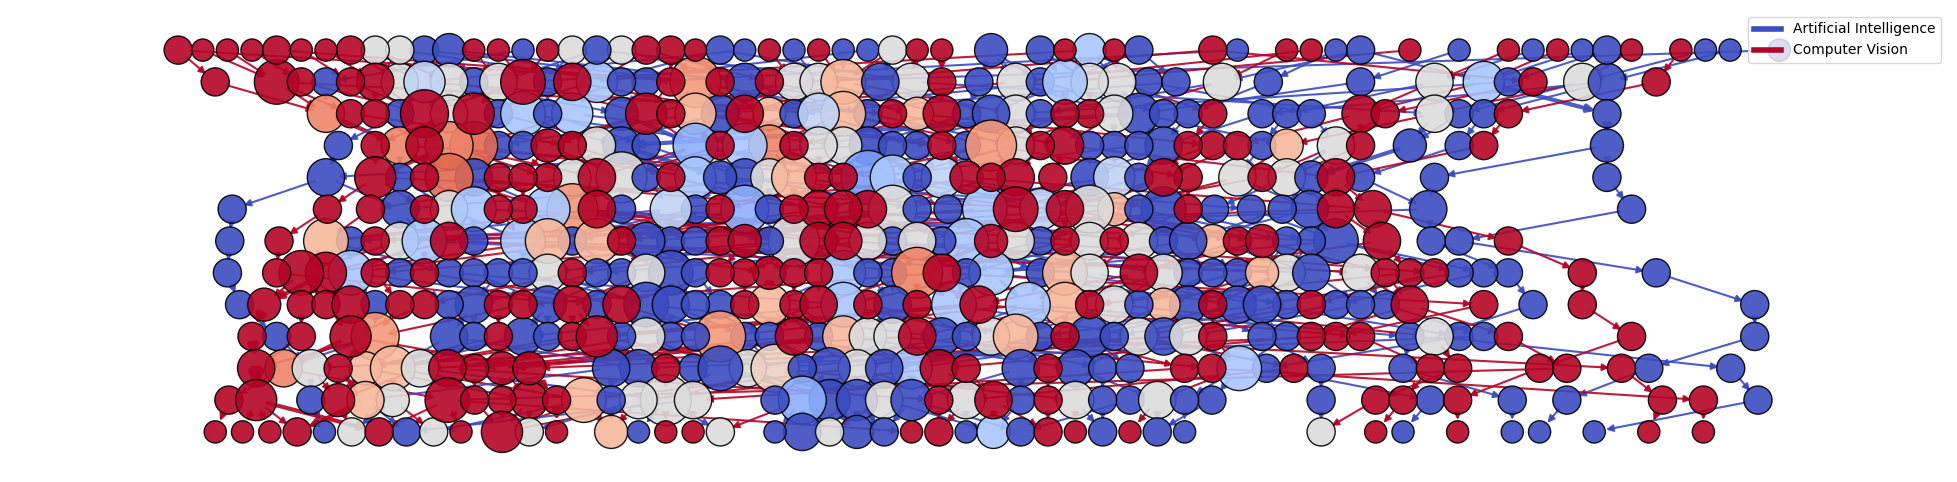

In [ ]:
# Visualização das ativações

import matplotlib.pyplot as plt
g_ai_cv = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'])
_ = llm_mri.get_graph_image(g_ai_cv)
plt.show()

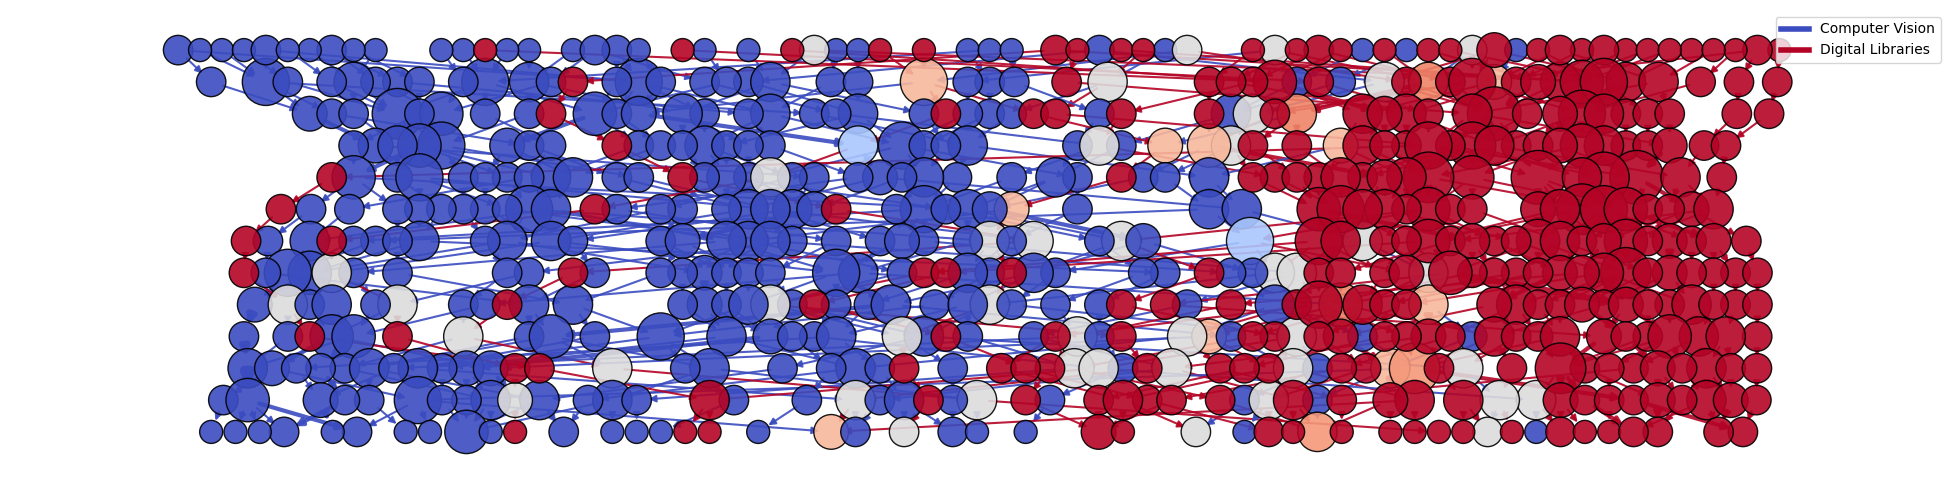

In [ ]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Computer Vision', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

### Getting individual graphs for metrics analysis

In [ ]:
g_ai = llm_mri.get_graph(['Artificial Intelligence'], threshold=0.4)
g_dl = llm_mri.get_graph(['Digital Libraries'], threshold=0.4)
g_cv = llm_mri.get_graph(['Computer Vision'], threshold=0.4)

In [ ]:
from llm_mri import Metrics

metrics_ai = Metrics(g_ai, model_name=model_ckpt, label="Artificial Intelligence")
print("Artificial Intelligence metrics: ", metrics_ai.get_basic_metrics())

metrics_dl = Metrics(g_dl, model_name=model_ckpt, label="Digital Libraries")
print("Digital Libraries metrics: ", metrics_dl.get_basic_metrics())

metrics_cv = Metrics(g_cv, model_name=model_ckpt, label="Computer Vision")
print("Computer Vision metrics: ", metrics_cv.get_basic_metrics())

Artificial Intelligence metrics:  {'mean_degree': 2.422976501305483, 'var_degree': 1.1138162481374652, 'skew_degree': 1.359131089720981, 'kurt_degree': 1.644548549278595, 'mean_strength': 2.506527415143603, 'var_strength': 1.418150998591992, 'skew_strength': 1.4943516806232104, 'kurt_strength': 2.0983679939682234, 'assortativity': 0.14452790551862174, 'density': 0.003171435211132831, 'center_of_mass': -0.5757180156657964, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'label': 'Artificial Intelligence'}
Digital Libraries metrics:  {'mean_degree': 2.5244956772334293, 'var_degree': 1.7992537189118956, 'skew_degree': 1.7541540685536545, 'kurt_degree': 3.2677861701243507, 'mean_strength': 2.76657060518732, 'var_strength': 2.9424630607519444, 'skew_strength': 2.000985843093608, 'kurt_strength': 5.051802599971886, 'assortativity': 0.1424815069136532, 'density': 0.0036481151405107362, 'center_of_mass': -0.4048991354466859, 'center_of_strength': nan, 'model_name': 'bert-base-unc

Evaluating metrics from similar (AI and CV) and distinct (AI and DL) categories:

In [ ]:
metrics_distinct = Metrics(g_ai_dl, model_name=model_ckpt, label="Artificial Intelligence and Digital Libraries")
print("Artificial Intelligence and Digital Libraries metrics: ", metrics_distinct.get_basic_metrics())

metrics_similar = Metrics(g_ai_cv, model_name=model_ckpt, label="Artificial Intelligence and Computer Vision")
print("Artificial Intelligence and Computer Vision metrics: ", metrics_similar.get_basic_metrics())

Artificial Intelligence and Digital Libraries metrics:  {'mean_degree': 2.736196319018405, 'var_degree': 1.7981962624749086, 'skew_degree': 1.3600476973264446, 'kurt_degree': 1.6953188371289745, 'mean_strength': 2.914110429447853, 'var_strength': 2.557895828032381, 'skew_strength': 1.6570299931761674, 'kurt_strength': 3.6964766509425466, 'assortativity': 0.1156872836103307, 'density': 0.002101533271135488, 'center_of_mass': -0.49079754601226994, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'label': 'Artificial Intelligence and Digital Libraries'}
Artificial Intelligence and Computer Vision metrics:  {'mean_degree': 2.96849087893864, 'var_degree': 2.528905858305372, 'skew_degree': 1.1011007294843673, 'kurt_degree': 0.6999548412609475, 'mean_strength': 3.12106135986733, 'var_strength': 3.182994220481204, 'skew_strength': 1.225615220009745, 'kurt_strength': 1.2969107753595286, 'assortativity': 0.13397614764092802, 'density': 0.0024655239858294353, 'center_of_mass': -0.601

Testing the amount of kept information after the reduction by training two different models using the Evaluation class:

In [ ]:
from llm_mri import Evaluation
evaluation = Evaluation(llm_mri)
results = evaluation.evaluate_model()


In [ ]:
print(results)
# print("Difference on obtained metrics: ", results['report_difference'])
print("Difference on cross-validation f1-score: ", results['delta']['f1_macro']['mean'])

{'delta': {'f1_macro': {'per_split': [-0.07039507175623338, 0.10615436771043174, 0.004488024053241446, -0.05484008837332166, -0.056487232574189195], 'mean': -0.014216000188014211}, 'f1_weighted': {'per_split': [-0.07039507175623327, 0.10615436771043174, 0.004488024053241446, -0.05484008837332166, -0.056487232574189195], 'mean': -0.014216000188014189}, 'recall_macro': {'per_split': [-0.05555555555555547, 0.08333333333333337, 0.0, -0.05555555555555558, -0.05555555555555558], 'mean': -0.016666666666666653}, 'recall_weighted': {'per_split': [-0.05555555555555558, 0.08333333333333337, 0.0, -0.05555555555555558, -0.05555555555555558], 'mean': -0.016666666666666673}, 'accuracy': {'per_split': [-0.05555555555555558, 0.08333333333333337, 0.0, -0.05555555555555558, -0.05555555555555558], 'mean': -0.016666666666666673}, 'balanced_accuracy': {'per_split': [-0.05555555555555547, 0.08333333333333337, 0.0, -0.05555555555555558, -0.05555555555555558], 'mean': -0.016666666666666653}}}
Difference on cro

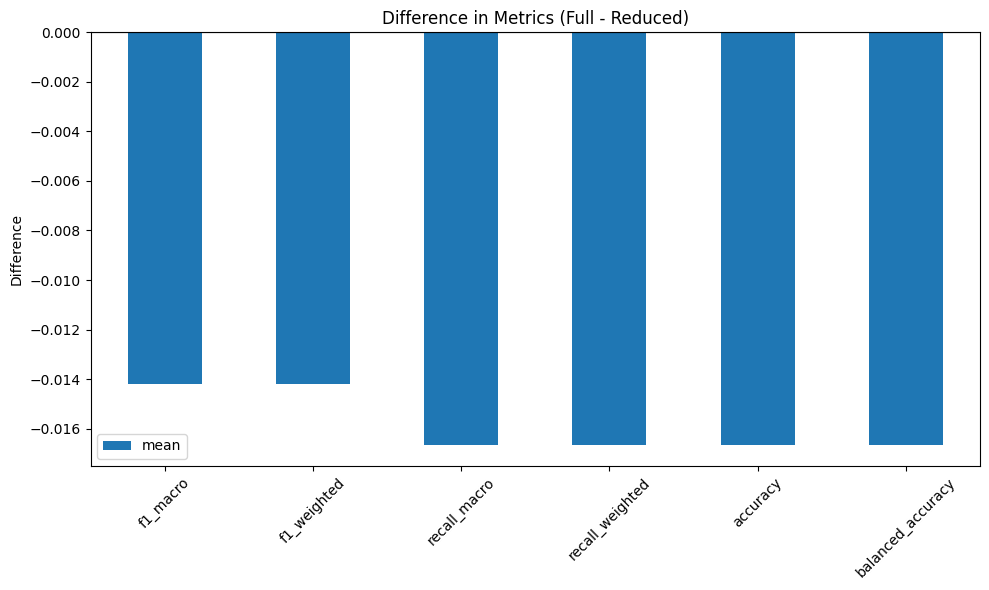

In [ ]:
df = pd.DataFrame(results['delta']).T
ax = df.plot(kind="bar", figsize=(10,6))
plt.axhline(0, color="black", linewidth=0.8)  # baseline at 0
plt.title("Difference in Metrics (Full - Reduced)")
plt.ylabel("Difference")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
